# Objective:
Design and implement a trading strategy using a combination of technical indicators such as RSI, MACD, Bollinger Bands, and others. The goal is to create a robust algorithm that can generate buy and sell signals based on these indicators.

## Data Collection

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
# data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
# data.to_csv('../Data/AAPL.csv')
data = pd.read_csv('../Data/AAPL.csv', index_col='Date', parse_dates=True)

## Data Exploration

In [3]:
import matplotlib.pyplot as plt

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,130.231998,131.892775,128.614983,130.311812,128.230002,1.120920e+08
std,30.596429,30.841435,30.287325,30.566496,30.563734,5.602586e+07
min,57.020000,57.125000,53.152500,56.092499,54.632893,3.519590e+07
25%,115.924374,117.275000,114.129997,115.739374,113.236633,7.636470e+07
50%,135.794998,137.200005,133.750000,135.379997,133.632828,9.493580e+07
75%,150.259998,151.902504,149.029995,150.704998,148.914700,1.296327e+08
max,182.630005,182.940002,179.119995,182.009995,179.481125,4.265100e+08


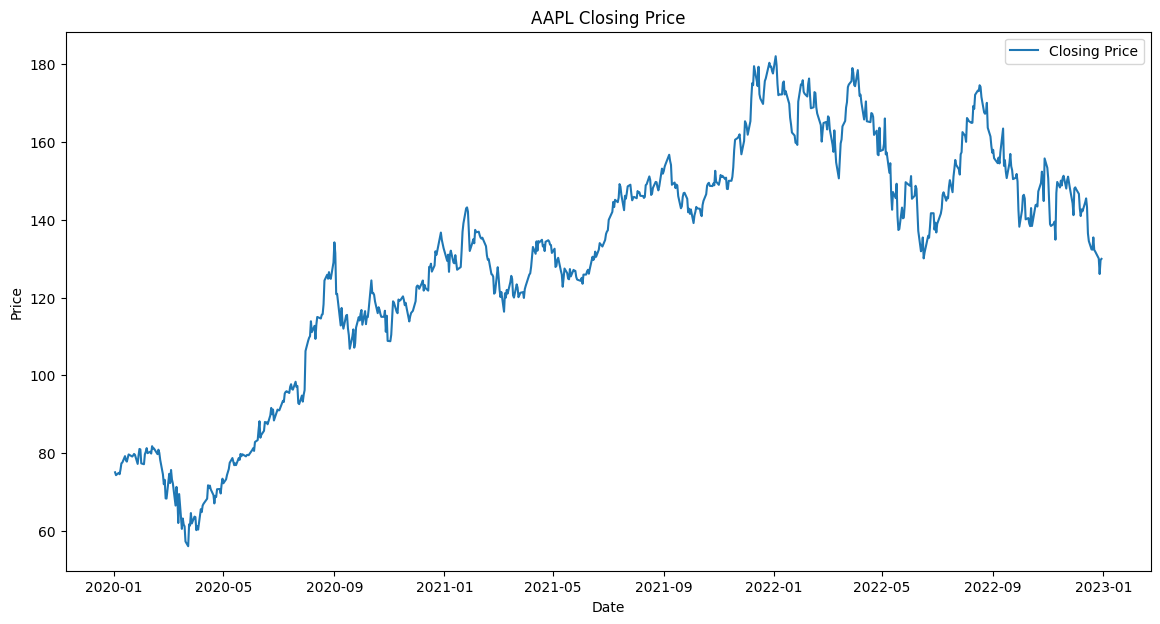

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

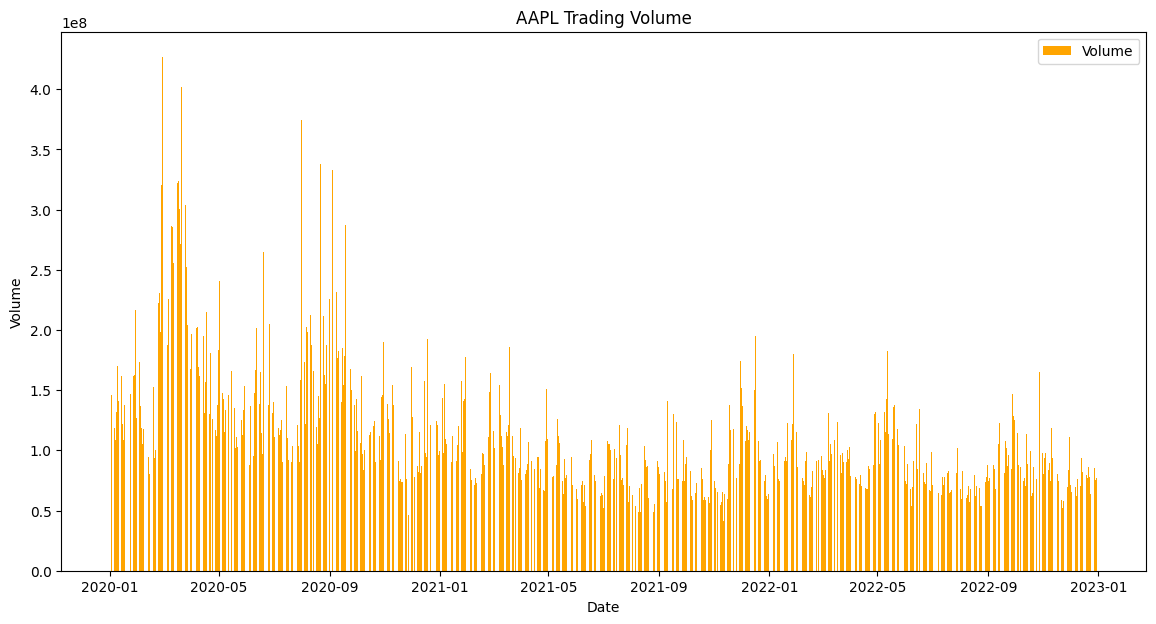

In [7]:
# Plot volume
plt.figure(figsize=(14, 7))
plt.bar(data.index, data['Volume'], label='Volume', color='orange')
plt.title('AAPL Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

## Implementing Technical Indicators

### 1. Simple Moving Average

**Definition:** The SMA is calculated by taking the arithmetic mean of a given set of values over a specific number of periods.

**Purpose:** It smooths out price data to identify the direction of the trend over a specified period.

**Why 20 Periods?:** The 20-period SMA is popular because it represents approximately one month of trading (assuming around 20 trading days in a month). This helps to identify medium-term trends.

In [8]:
def SMA(data, window):
    return data['Close'].rolling(window=window).mean()

data['SMA_20'] = SMA(data, 20)

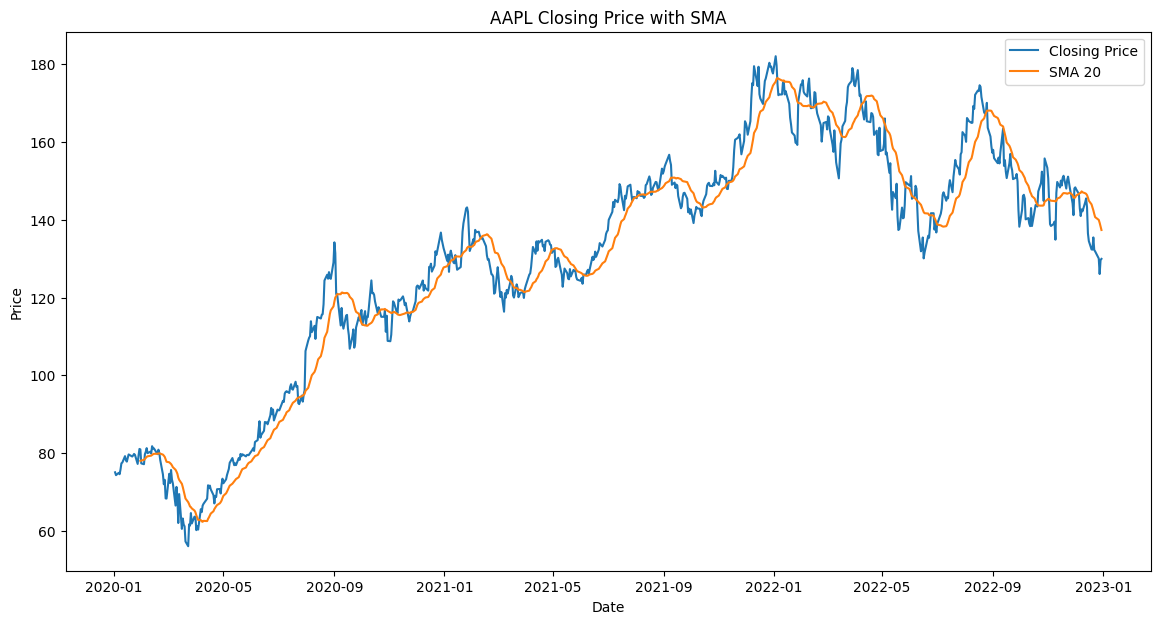

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_20'], label='SMA 20')
plt.title('AAPL Closing Price with SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 2. Exponential Moving Average

**Definition:** The EMA gives more weight to recent prices, making it more responsive to new information compared to the SMA.

**Purpose:** Similar to the SMA, but more sensitive to recent price changes, which can be useful for detecting short-term trends.

**Why 20 Periods?:** The 20-period EMA is used for the same reason as the 20-period SMA, providing a balance between short-term and long-term price movements.

In [10]:
def EMA(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

data['EMA_20'] = EMA(data, 20)

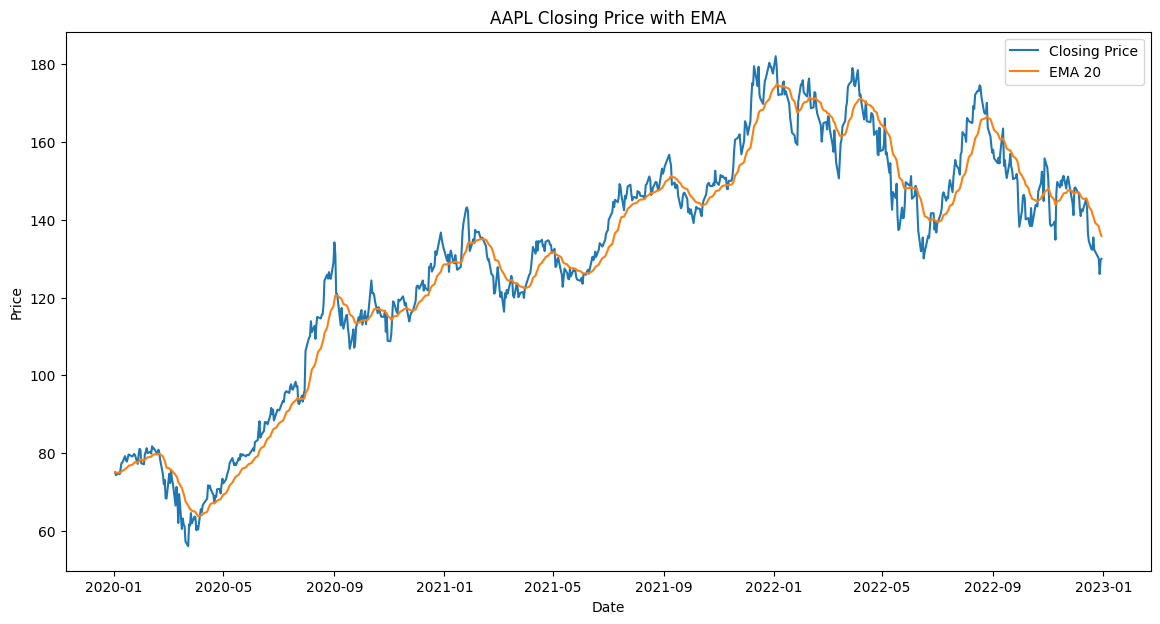

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['EMA_20'], label='EMA 20')
plt.title('AAPL Closing Price with EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

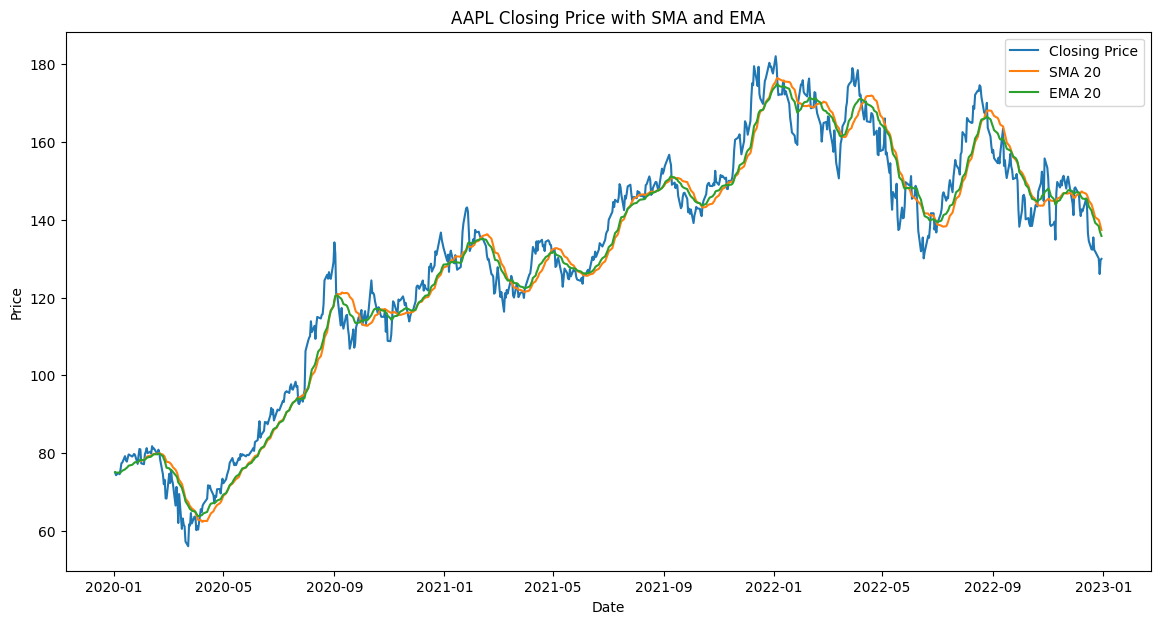

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['EMA_20'], label='EMA 20')
plt.title('AAPL Closing Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 3. RSI - Relative Strength Index

**Definition:** The RSI is a momentum oscillator that measures the speed and change of price movements.

**Formula:** RSI = 100 - (100 / (1 + RS)), where RS is the average gain of up periods divided by the average loss of down periods over the specified period.

**Purpose:** Identifies overbought or oversold conditions in a market, typically on a scale of 0 to 100.

**Why 14 Periods?:**
The default 14-period RSI was introduced by its creator, J. Welles Wilder. It provides a good balance between responsiveness and reliability, smoothing out noise while capturing significant price movements.

In [13]:
def RSI(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = RSI(data, 14)

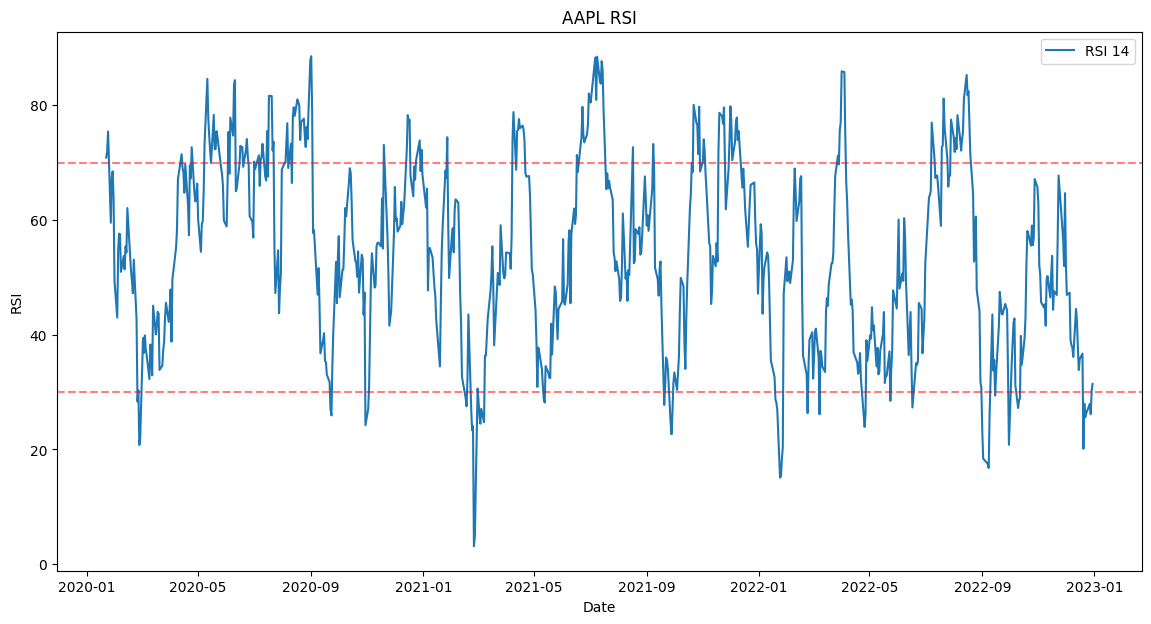

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(data['RSI_14'], label='RSI 14')
plt.title('AAPL RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.legend()
plt.show()

### 4. MACD - Moving Average Convergence Divergence

**Definition:** The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

**Components:**

MACD Line: The difference between the 12-period EMA and the 26-period EMA.

Signal Line: A 9-period EMA of the MACD Line.

**Histogram:** The difference between the MACD Line and the Signal Line.

**Purpose:** Helps to identify changes in the strength, direction, momentum, and duration of a trend.

**Standard Periods:**
12, 26, and 9 are standard periods because they provide a balance between short-term and long-term trends, offering clear signals without excessive lag.

In [15]:
def MACD(data, short_window=12, long_window=26, signal_window=9):
    short_ema = EMA(data, short_window)
    long_ema = EMA(data, long_window)
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal

data['MACD'], data['Signal_Line'] = MACD(data)

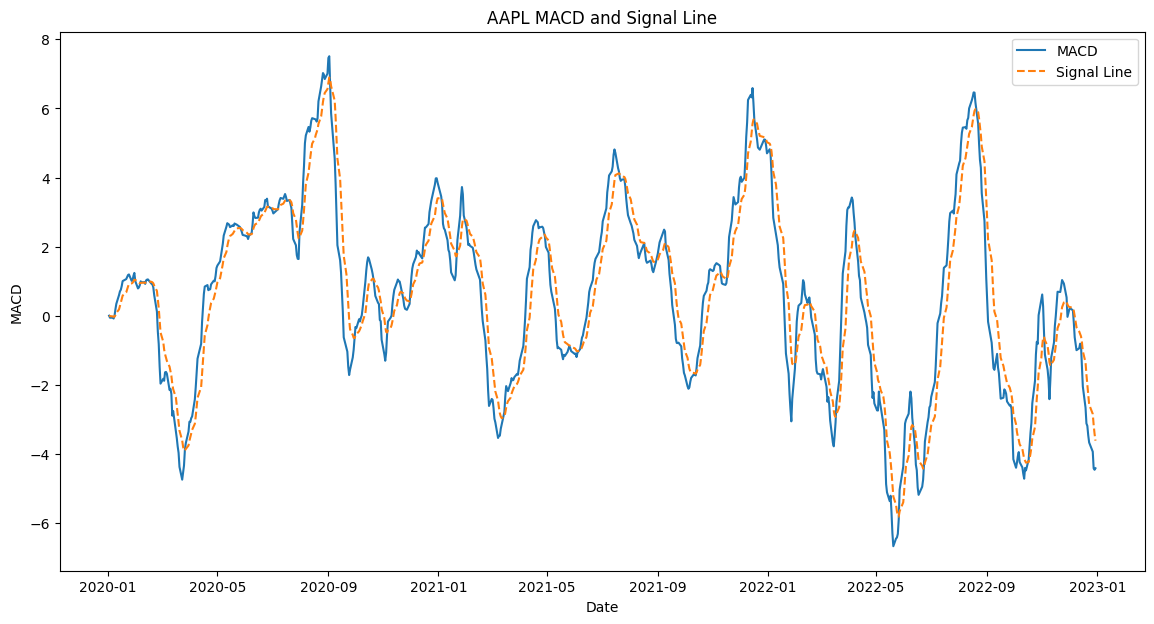

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['MACD'], label='MACD')
plt.plot(data.index, data['Signal_Line'], label='Signal Line', linestyle='--')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

### 5. Bollinger Bands

**Definition:** Bollinger Bands consist of a middle band (SMA) and two outer bands (standard deviations above and below the SMA).

**Formula:**

*Middle Band:* 20-period SMA.

*Upper Band:* Middle Band + 2 standard deviations.

*Lower Band:* Middle Band - 2 standard deviations.

**Purpose:** Measures market volatility and provides a relative definition of high and low prices.

**Why 20 Periods and 2 Standard Deviations?:** The 20-period SMA represents approximately one month of trading data.
Using 2 standard deviations captures about 95% of price movements, making it a useful range for identifying potential reversal points.


In [17]:
def Bollinger_Bands(data, window=20):
    sma = SMA(data, window)
    std = data['Close'].rolling(window=window).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return upper_band, lower_band

data['Upper_Band'], data['Lower_Band'] = Bollinger_Bands(data)

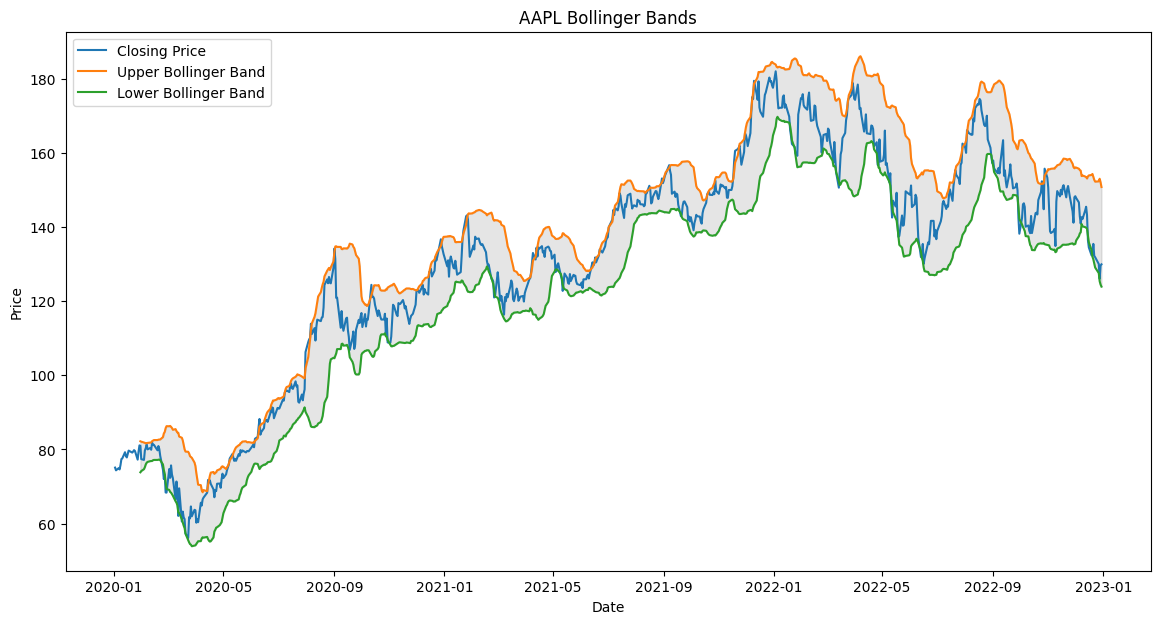

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.plot(data.index, data['Upper_Band'], label='Upper Bollinger Band')
plt.plot(data.index, data['Lower_Band'], label='Lower Bollinger Band')
plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='gray', alpha=0.2)
plt.title('AAPL Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

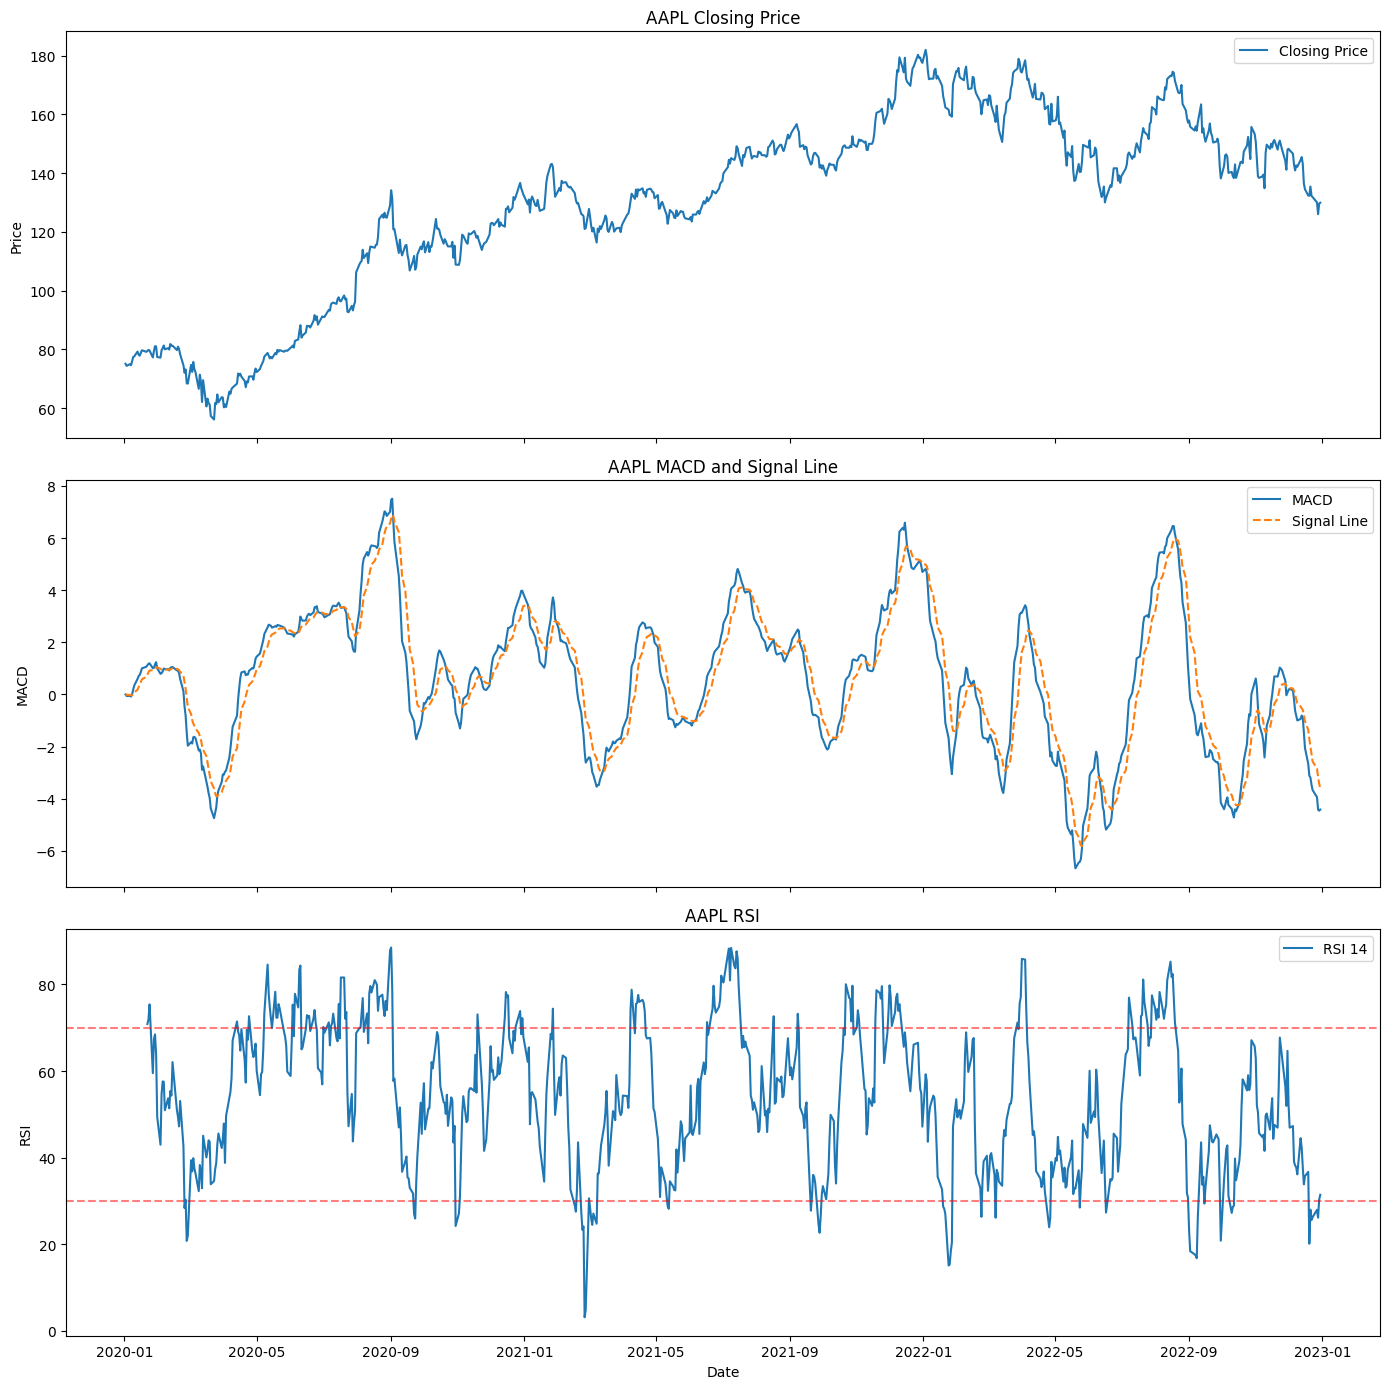

In [19]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

# Plot Closing Price and Moving Averages
ax1.plot(data.index, data['Close'], label='Closing Price')
ax1.set_title('AAPL Closing Price')
ax1.set_ylabel('Price')
ax1.legend()

# Plot MACD and Signal Line
ax2.plot(data.index, data['MACD'], label='MACD')
ax2.plot(data.index, data['Signal_Line'], label='Signal Line', linestyle='--')
ax2.set_title('AAPL MACD and Signal Line')
ax2.set_ylabel('MACD')
ax2.legend()

# Plot RSI
ax3.plot(data.index, data['RSI_14'], label='RSI 14')
ax3.set_title('AAPL RSI')
ax3.set_xlabel('Date')
ax3.set_ylabel('RSI')
ax3.axhline(30, linestyle='--', alpha=0.5, color='red')
ax3.axhline(70, linestyle='--', alpha=0.5, color='red')
ax3.legend()

plt.tight_layout()
plt.show()

## Strategy Development

### Strategy: Moving Average Crossover
**Objective:**

Capture significant changes in price trends by identifying trend reversals using the crossing of a short-term moving average (e.g., 50-day SMA) and a long-term moving average (e.g., 200-day SMA).



In [20]:
data['SMA_50'] = SMA(data, 50)
data['SMA_200'] = SMA(data, 200)

In [21]:
def generate_signals(data):
    data['Signal'] = 0
    data.iloc[50:, data.columns.get_loc('Signal')] = np.where(data.iloc[50:]['SMA_50'] > data.iloc[50:]['SMA_200'], 1, 0)
    data['Position'] = data['Signal'].diff()
    return data

data = generate_signals(data)


In [35]:
def backtest_strategy(data, initial_capital=100000):
    positions = pd.DataFrame(index=data.index).fillna(0.0)
    positions['AAPL'] = data['Signal']  # This column will hold the number of shares held

    portfolio = pd.DataFrame(index=data.index)
    portfolio['cash'] = initial_capital
    portfolio['total'] = initial_capital
    num_shares = 0
    cash = initial_capital

    for i in range(1, len(data)):
        if data['Position'].iloc[i] == 1:  # Buy signal
            num_shares = cash // data['Close'].iloc[i]
            cash -= num_shares * data['Close'].iloc[i]
        elif data['Position'].iloc[i] == -1:  # Sell signal
            cash += num_shares * data['Close'].iloc[i]
            num_shares = 0
        portfolio.loc[data.index[i], 'cash'] = float(cash)
        portfolio.loc[data.index[i], 'total'] = float(cash + num_shares * data['Close'].iloc[i])

    # Track trades
    trades = pd.DataFrame(index=data.index, columns=['Buy', 'Sell'])
    trades['Buy'] = data.loc[data['Position'] == 1, 'Close']
    trades['Sell'] = data.loc[data['Position'] == -1, 'Close']

    return portfolio, trades

portfolio, trades = backtest_strategy(data)


/var/folders/82/41js8vcx7_v0crff6_9rfj_h0000gn/T/ipykernel_4166/2848415360.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '52.120758056640625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.loc[data.index[i], 'cash'] = float(cash)
/var/folders/82/41js8vcx7_v0crff6_9rfj_h0000gn/T/ipykernel_4166/2848415360.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98600.67797851562' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.loc[data.index[i], 'total'] = float(cash + num_shares * data['Close'].iloc[i])


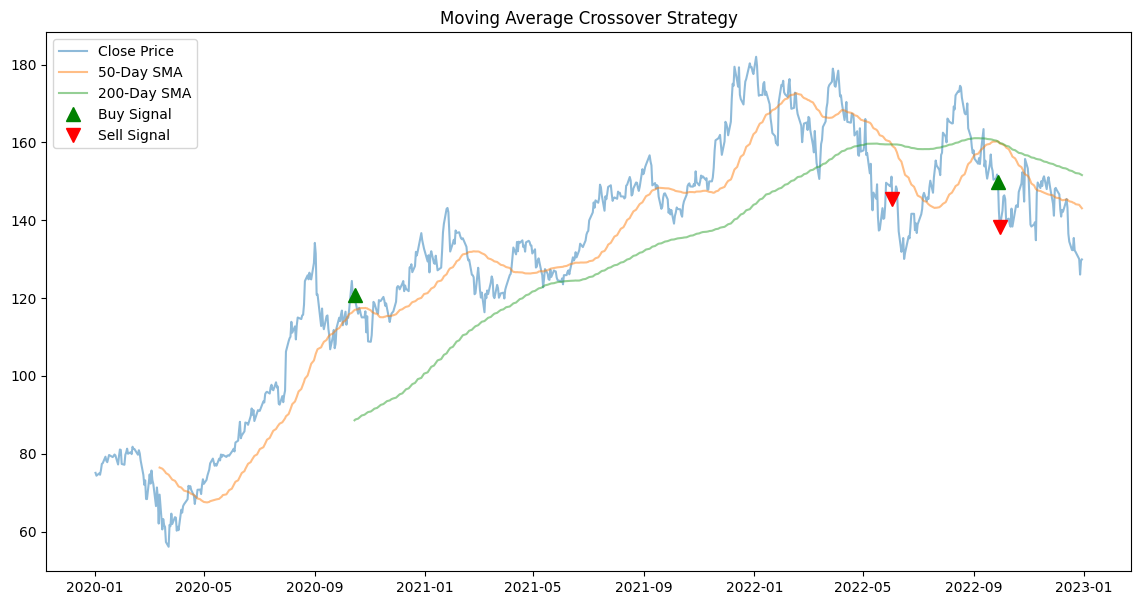

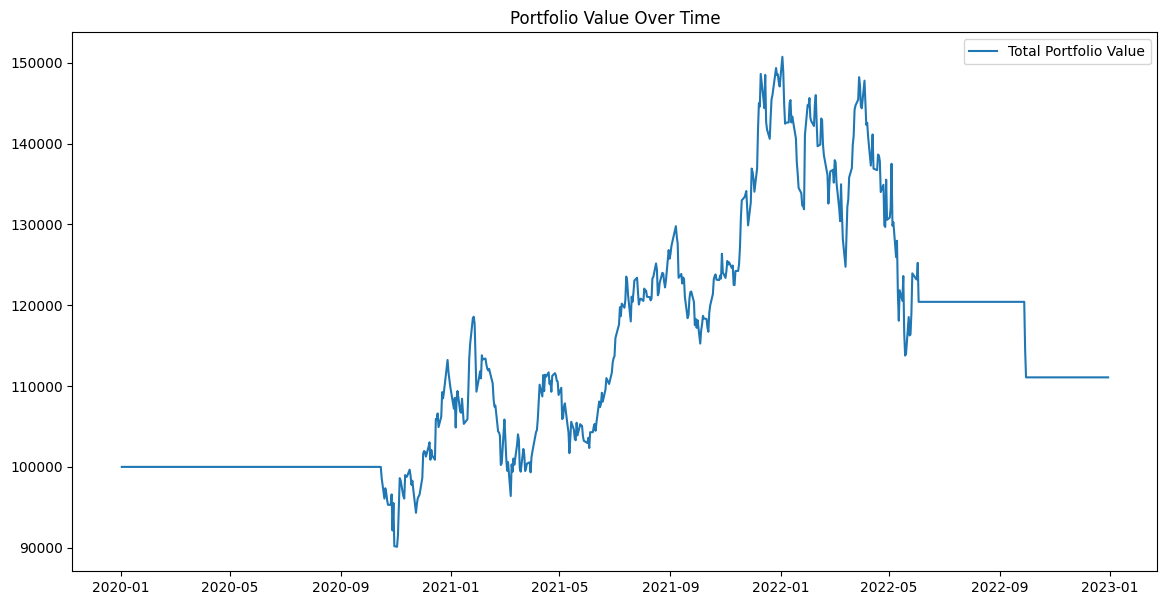

Buy Trades:
                   Buy  Sell
Date                        
2020-10-15  120.709999   NaN
2022-09-28  149.839996   NaN

Sell Trades:
            Buy        Sell
Date                       
2022-06-03  NaN  145.380005
2022-09-30  NaN  138.199997

Initial Capital: 100000.00 INR
Final Portfolio Value: 111079.85 INR
Total Profit: 11079.85 INR


In [36]:
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter notebook
%matplotlib inline

# Plot the closing price and the moving averages
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', alpha=0.5)
plt.plot(data.index, data['SMA_200'], label='200-Day SMA', alpha=0.5)

# Plot buy signals
plt.plot(data.loc[data['Position'] == 1].index, data['Close'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(data.loc[data['Position'] == -1].index, data['Close'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio['total'], label='Total Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

# Display buy and sell trades
print("Buy Trades:")
print(trades.dropna(subset=['Buy']))

print("\nSell Trades:")
print(trades.dropna(subset=['Sell']))

# Calculate and display the profit
initial_capital = 100000
final_portfolio_value = portfolio['total'].iloc[-1]
profit = final_portfolio_value - initial_capital
print(f'\nInitial Capital: {initial_capital:.2f} INR')
print(f'Final Portfolio Value: {final_portfolio_value:.2f} INR')
print(f'Total Profit: {profit:.2f} INR')


### Creating a function for testing for more stocks

In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter notebook
%matplotlib inline

def moving_average_crossover_strategy(ticker, start_date, end_date, initial_capital=100000):
    # Step 1: Data Collection and Preparation
    data = yf.download(ticker, start=start_date, end=end_date)
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    
    # Step 2: Generate Buy and Sell Signals
    data['Signal'] = 0
    data['Signal'][50:] = np.where(data['SMA_50'][50:] > data['SMA_200'][50:], 1, 0)
    data['Position'] = data['Signal'].diff()
    
    # Step 3: Backtest the Strategy and Track Trades
    positions = pd.DataFrame(index=data.index).fillna(0.0)
    positions['AAPL'] = data['Signal']  # This column will hold the number of shares held

    portfolio = pd.DataFrame(index=data.index)
    portfolio['cash'] = initial_capital
    portfolio['total'] = initial_capital
    num_shares = 0
    cash = initial_capital

    for i in range(1, len(data)):
        if data['Position'].iloc[i] == 1:  # Buy signal
            num_shares = cash // data['Close'].iloc[i]
            cash -= num_shares * data['Close'].iloc[i]
        elif data['Position'].iloc[i] == -1:  # Sell signal
            cash += num_shares * data['Close'].iloc[i]
            num_shares = 0
        portfolio.loc[data.index[i], 'cash'] = float(cash)
        portfolio.loc[data.index[i], 'total'] = float(cash + num_shares * data['Close'].iloc[i])

    # Track trades
    trades = pd.DataFrame(index=data.index, columns=['Buy', 'Sell'])
    trades['Buy'] = data.loc[data['Position'] == 1, 'Close']
    trades['Sell'] = data.loc[data['Position'] == -1, 'Close']

    # Step 4: Plot the Results
    # Plot the closing price and the moving averages
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)
    plt.plot(data.index, data['SMA_50'], label='50-Day SMA', alpha=0.5)
    plt.plot(data.index, data['SMA_200'], label='200-Day SMA', alpha=0.5)

    # Plot buy signals
    plt.plot(data.loc[data['Position'] == 1].index, data['Close'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

    # Plot sell signals
    plt.plot(data.loc[data['Position'] == -1].index, data['Close'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

    plt.title(f'Moving Average Crossover Strategy for {ticker}')
    plt.legend()
    plt.show()

    # Plot the portfolio value over time
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio['total'], label='Total Portfolio Value')
    plt.title(f'Portfolio Value Over Time for {ticker}')
    plt.legend()
    plt.show()

    # Display buy and sell trades
    print("Buy Trades:")
    print(trades.dropna(subset=['Buy']))

    print("\nSell Trades:")
    print(trades.dropna(subset=['Sell']))

    # Calculate and display the profit
    final_portfolio_value = portfolio['total'].iloc[-1]
    profit = final_portfolio_value - initial_capital
    print(f'\nInitial Capital: {initial_capital:.2f} INR')
    print(f'Final Portfolio Value: {final_portfolio_value:.2f} INR')
    print(f'Total Profit: {profit:.2f} INR')

    return portfolio, trades, profit



Testing strategy for AAPL


[*********************100%%**********************]  1 of 1 completed
/var/folders/82/41js8vcx7_v0crff6_9rfj_h0000gn/T/ipykernel_4166/3311770008.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = np.where(data['SMA_50'

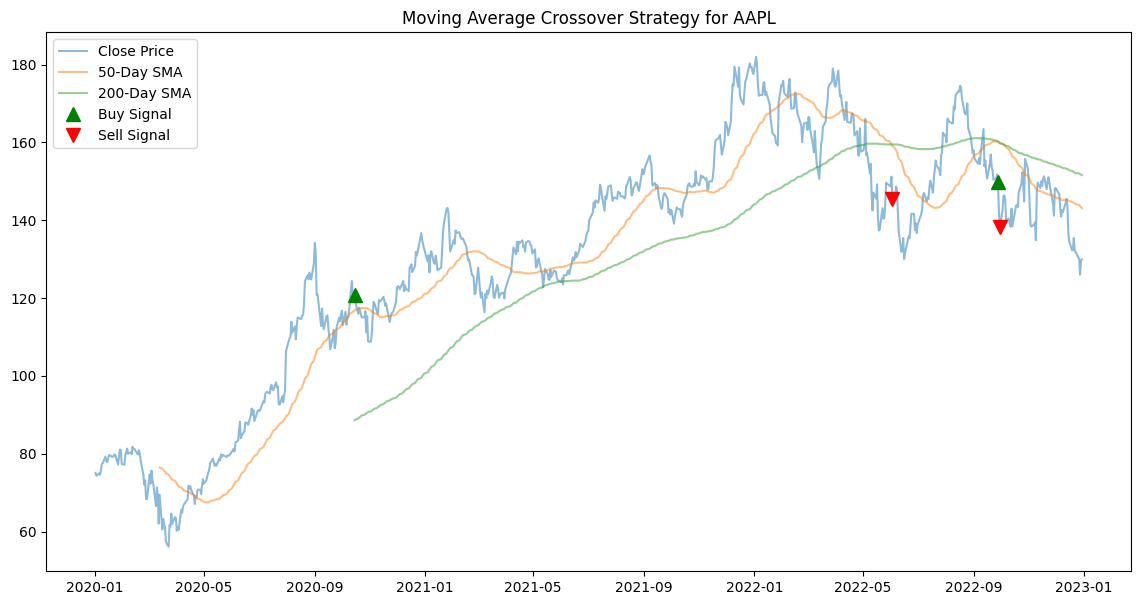

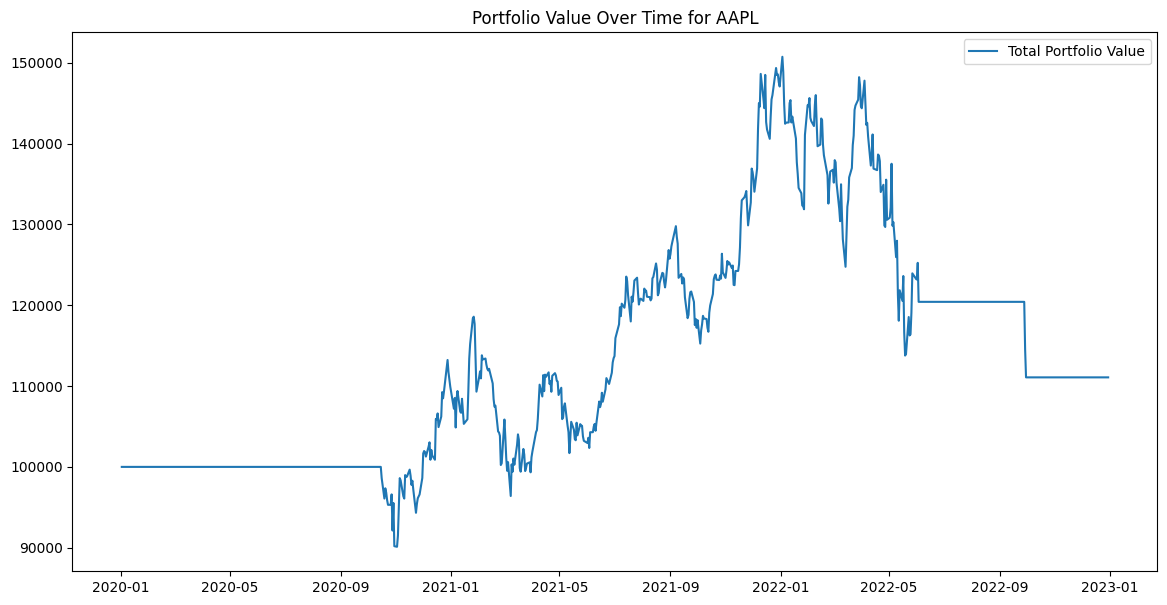

Buy Trades:
                   Buy  Sell
Date                        
2020-10-15  120.709999   NaN
2022-09-28  149.839996   NaN

Sell Trades:
            Buy        Sell
Date                       
2022-06-03  NaN  145.380005
2022-09-30  NaN  138.199997

Initial Capital: 100000.00 INR
Final Portfolio Value: 111079.85 INR
Total Profit: 11079.85 INR


Testing strategy for GOOGL


[*********************100%%**********************]  1 of 1 completed
/var/folders/82/41js8vcx7_v0crff6_9rfj_h0000gn/T/ipykernel_4166/3311770008.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = np.where(data['SMA_50'

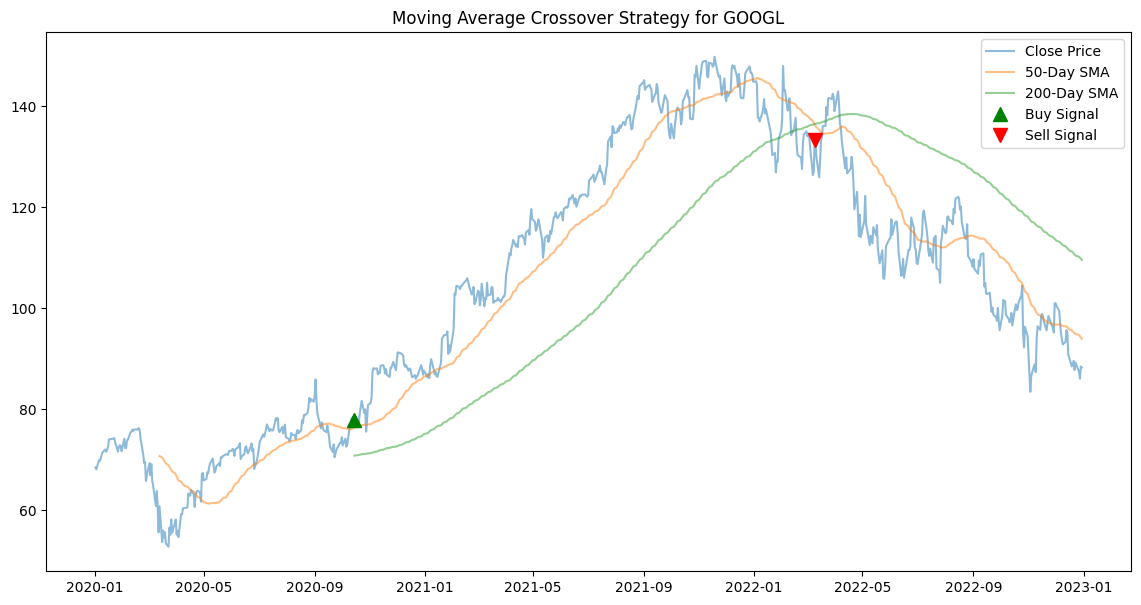

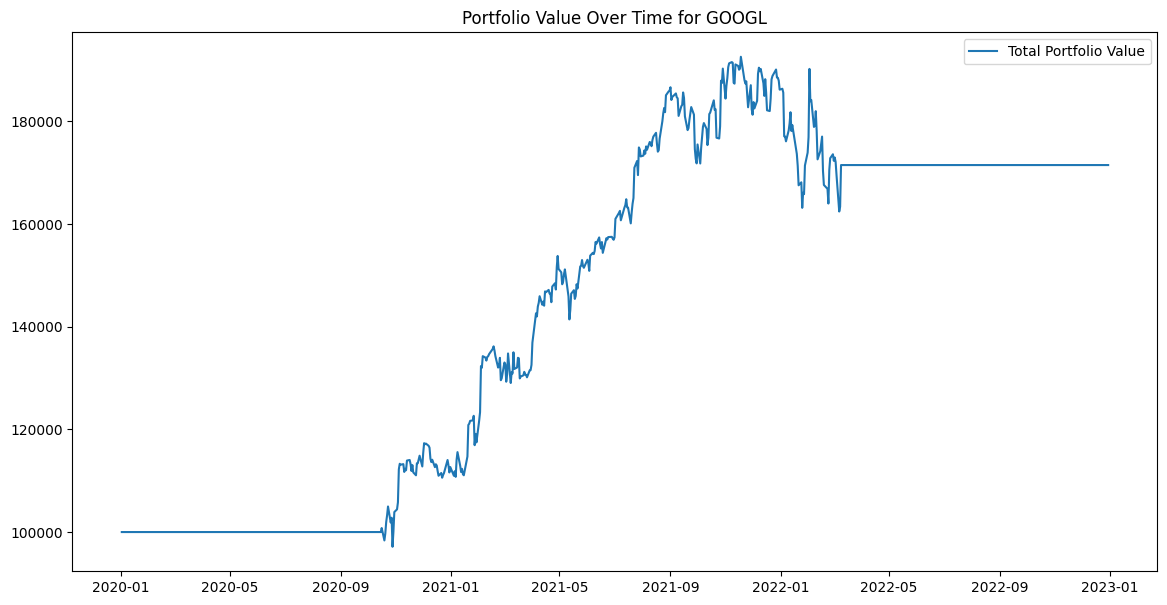

Buy Trades:
                  Buy  Sell
Date                       
2020-10-15  77.773499   NaN

Sell Trades:
            Buy        Sell
Date                       
2022-03-09  NaN  133.419998

Initial Capital: 100000.00 INR
Final Portfolio Value: 171505.75 INR
Total Profit: 71505.75 INR


Testing strategy for MSFT


[*********************100%%**********************]  1 of 1 completed
/var/folders/82/41js8vcx7_v0crff6_9rfj_h0000gn/T/ipykernel_4166/3311770008.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = np.where(data['SMA_50'

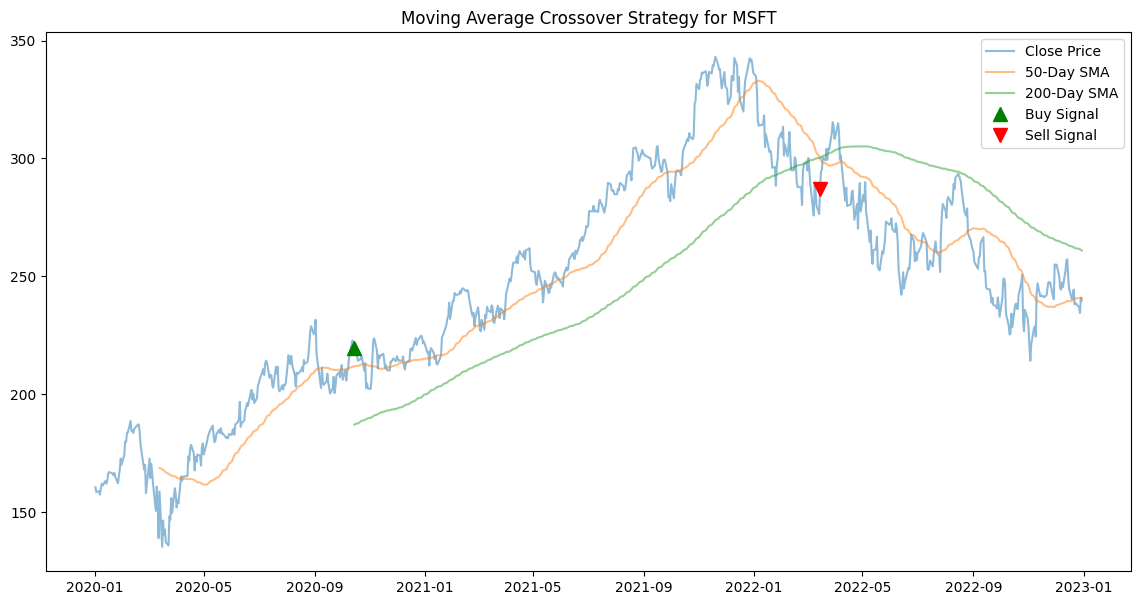

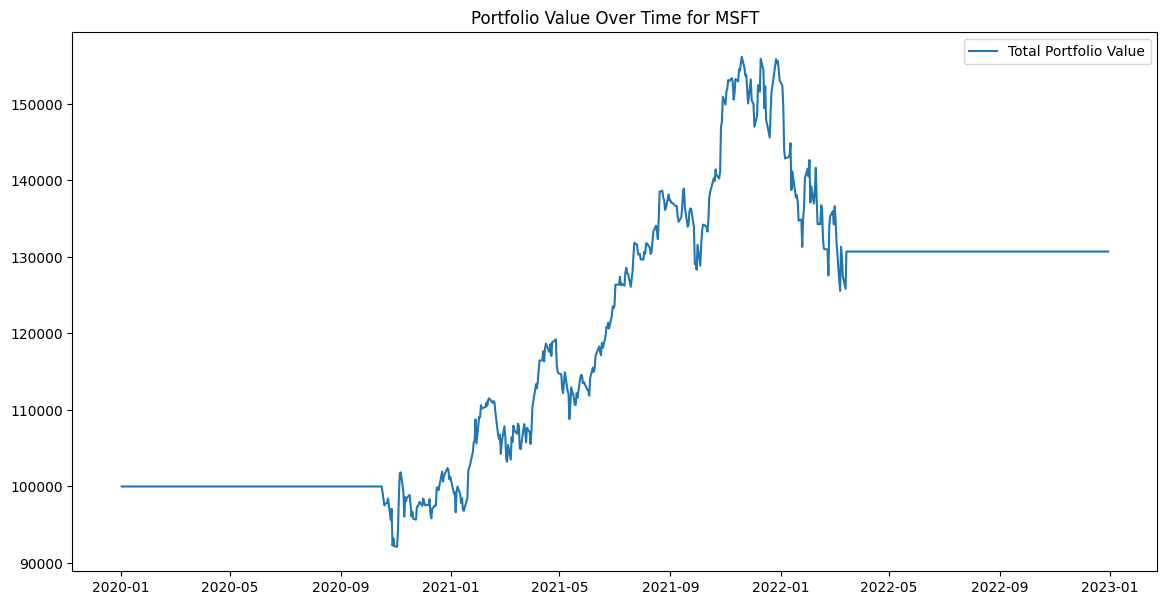

Buy Trades:
                   Buy  Sell
Date                        
2020-10-15  219.660004   NaN

Sell Trades:
            Buy        Sell
Date                       
2022-03-15  NaN  287.149994

Initial Capital: 100000.00 INR
Final Portfolio Value: 130707.95 INR
Total Profit: 30707.95 INR


Testing strategy for AMZN


[*********************100%%**********************]  1 of 1 completed
/var/folders/82/41js8vcx7_v0crff6_9rfj_h0000gn/T/ipykernel_4166/3311770008.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = np.where(data['SMA_50'

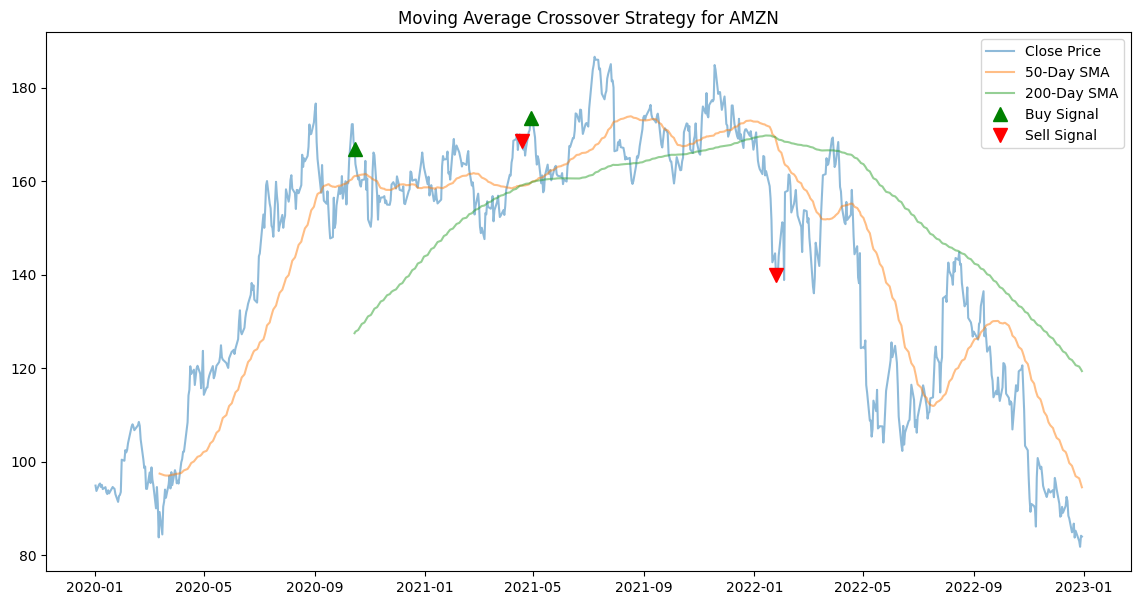

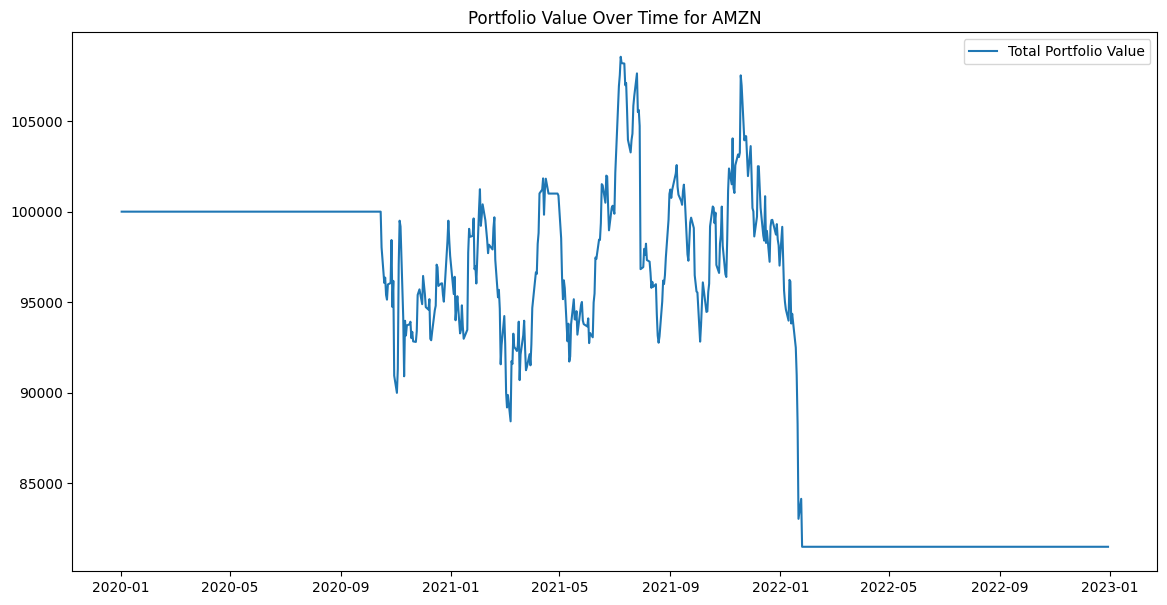

Buy Trades:
                   Buy  Sell
Date                        
2020-10-15  166.932495   NaN
2021-04-29  173.565506   NaN

Sell Trades:
            Buy        Sell
Date                       
2021-04-19  NaN  168.600494
2022-01-25  NaN  139.985992

Initial Capital: 100000.00 INR
Final Portfolio Value: 81489.43 INR
Total Profit: -18510.57 INR


Testing strategy for TSLA


[*********************100%%**********************]  1 of 1 completed
/var/folders/82/41js8vcx7_v0crff6_9rfj_h0000gn/T/ipykernel_4166/3311770008.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = np.where(data['SMA_50'

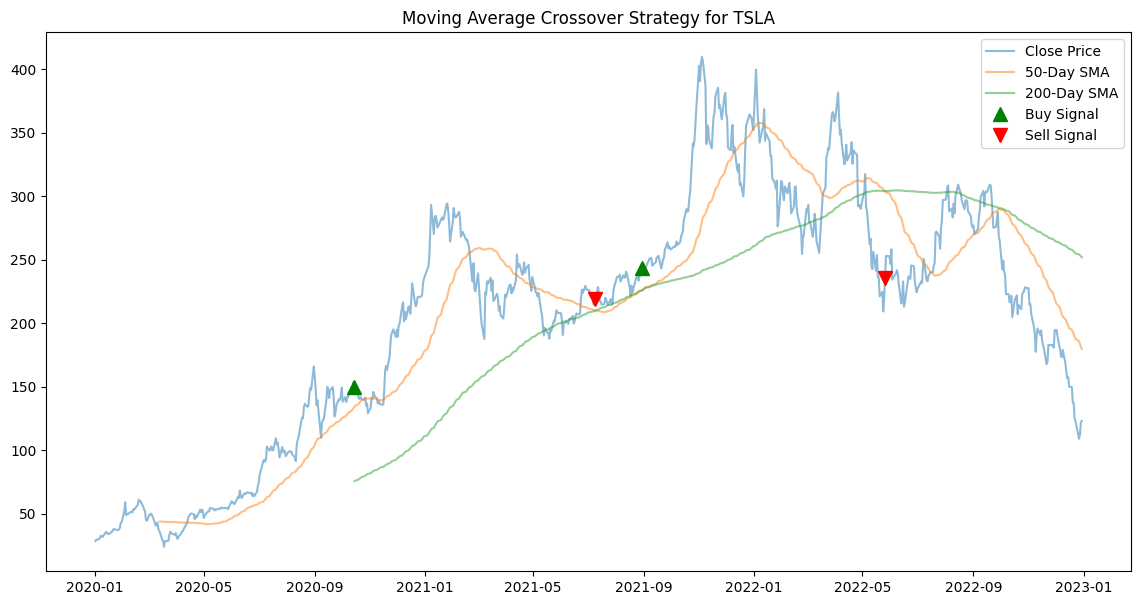

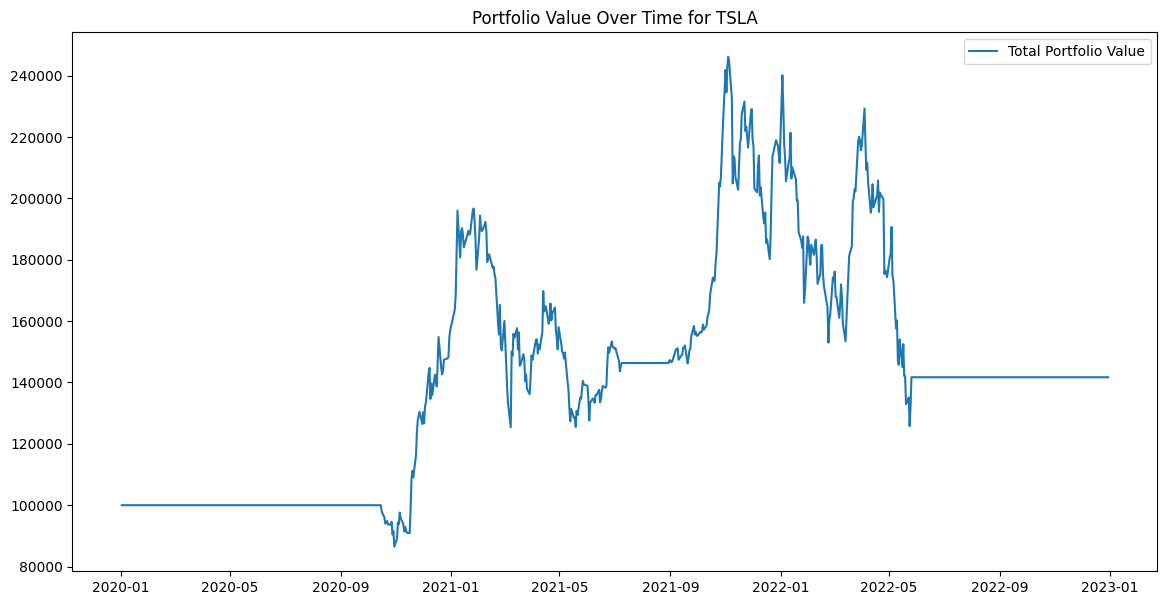

Buy Trades:
                   Buy  Sell
Date                        
2020-10-15  149.626663   NaN
2021-08-30  243.636673   NaN

Sell Trades:
            Buy        Sell
Date                       
2021-07-09  NaN  218.983337
2022-05-26  NaN  235.910004

Initial Capital: 100000.00 INR
Final Portfolio Value: 141694.26 INR
Total Profit: 41694.26 INR


In [38]:
# Test the strategy for multiple stocks
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = '2020-01-01'
end_date = '2023-01-01'

for stock in stocks:
    print(f'\n\nTesting strategy for {stock}')
    portfolio, trades, profit = moving_average_crossover_strategy(stock, start_date, end_date)